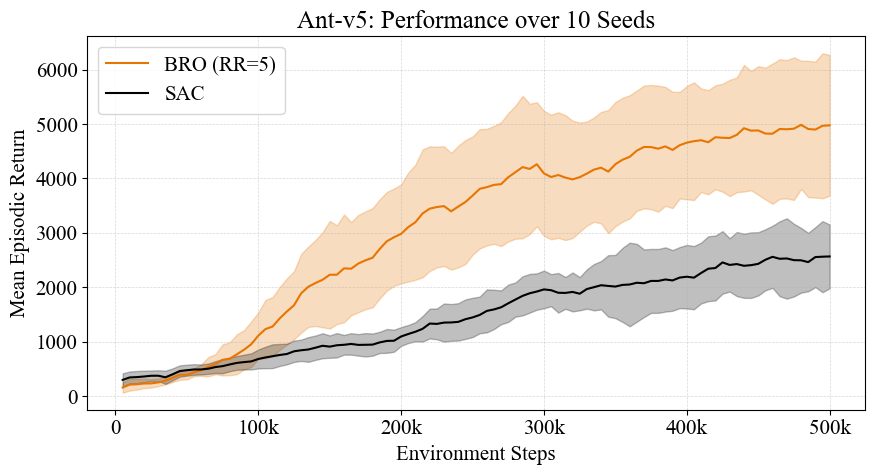

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
mpl.rcParams.update({
    'font.family': 'serif',
    'font.serif':  ['Times New Roman'],
    'font.size':   15
})

eval_interval = 5_000
total_steps   = 500_000
n_evals       = total_steps // eval_interval

def moving_average(x, window=5):
    return pd.Series(x).rolling(window, center=True, min_periods=1).mean().to_numpy()

window = 10 # 5 or 10

def load_seed_returns(pattern: str, expected_len: int, window: int):
    files = sorted(Path('.').glob(pattern))
    returns_list = []
    for f in files:
        series = pd.read_csv(f).iloc[:, 0].values
        series = moving_average(series, window)
        returns_list.append(series)
    return np.vstack(returns_list)

bro_data = load_seed_returns('returns_Ant-v5_RR5_*.csv', n_evals, window)
sac_data = load_seed_returns('returns_Ant-v5_SAC256_*.csv', n_evals, window)

steps = np.arange(1, n_evals + 1) * eval_interval

fig, ax = plt.subplots(figsize=(9, 5))

for data, label, color in [(bro_data, 'BRO (RR=5)', '#E77500'), (sac_data, 'SAC', '#000000')]:
    mean = data.mean(axis=0)
    std  = data.std(axis=0)
    
    line, = ax.plot(steps, mean, label=label, color=color)
    
    ax.fill_between(steps,
                    np.maximum(mean - std, 0.0),
                    mean + std,
                    alpha=0.25,
                    color=color)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1_000)}k' if x != 0 else '0'))
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Mean Episodic Return')
ax.set_title('Ant-v5: Performance over 10 Seeds')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

fig.savefig('BRO_SAC_Ant-v5.pdf', bbox_inches='tight')

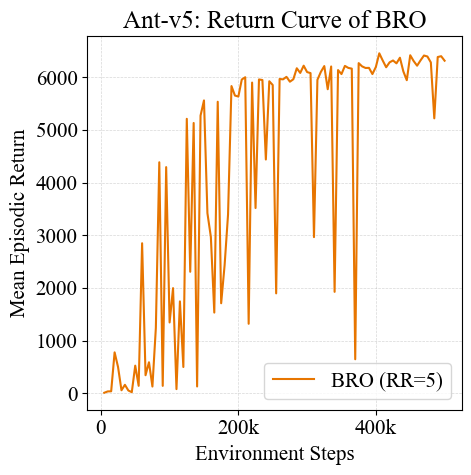

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter

mpl.rcParams.update({
    'font.family': 'serif',
    'font.serif':  ['Times New Roman'],
    'font.size':   15
})

eval_interval = 5_000
total_steps   = 500_000
n_evals       = total_steps // eval_interval

def moving_average(x, window=10):
    return pd.Series(x).rolling(window, center=True, min_periods=1).mean().to_numpy()

csv_path = Path('returns_Ant-v5_RR5_4.csv')
series   = pd.read_csv(csv_path).iloc[:, 0].values
series   = moving_average(series, window=1) # no smoothing

steps = np.arange(1, n_evals + 1) * eval_interval

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(steps, series, label='BRO (RR=5)', color='#E77500')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1_000)}k' if x != 0 else '0'))

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Mean Episodic Return')
ax.set_title('Ant-v5: Return Curve of BRO')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

fig.savefig('BRO_Ant-v5.pdf', bbox_inches='tight')


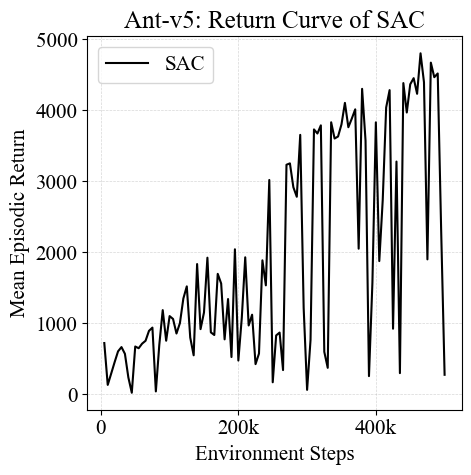

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter

mpl.rcParams.update({
    'font.family': 'serif',
    'font.serif':  ['Times New Roman'],
    'font.size':   15
})

eval_interval = 5_000
total_steps   = 500_000
n_evals       = total_steps // eval_interval

def moving_average(x, window=10):
    return pd.Series(x).rolling(window, center=True, min_periods=1).mean().to_numpy()

csv_path = Path('returns_Ant-v5_SAC256_4.csv')
series   = pd.read_csv(csv_path).iloc[:, 0].values
series   = moving_average(series, window=1) # no smoothing

steps = np.arange(1, n_evals + 1) * eval_interval

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(steps, series, label='SAC', color='#000000')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1_000)}k' if x != 0 else '0'))

ax.set_xlabel('Environment Steps')
ax.set_ylabel('Mean Episodic Return')
ax.set_title('Ant-v5: Return Curve of SAC')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

fig.savefig('SAC_Ant-v5.pdf', bbox_inches='tight')
